In [33]:
# import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# pilih range tanggal
start_date = '2021-01-01'
end_date = '2023-12-07'

In [35]:
# load dataset harga sayur
data = pd.read_csv('../data/data-sayur.csv', sep=";")
data.head(5)

,id,Tgl,Kab/Kota,Tingkat Harga,BMB,BMK,BPI,BPL,BNC,CMB,...,CRH,CRM,KBK,KTG,KLB,KLG,MTM,TMT,WRT,CHB
0,45645,31 Oktober 2023,Wonosobo,Harga Produsen,0,10000,0,18000,0,0,...,47000,68000,0,11000,0,2000,0,3000,8000,0.0
1,28616,31 Oktober 2022,Wonosobo,Harga Produsen,0,16000,0,17000,0,0,...,16000,32000,0,10000,0,2500,0,5000,5000,0.0
2,38100,31 Mei 2023,Wonosobo,Harga Produsen,0,19000,0,22000,0,0,...,22000,26000,0,14000,0,6000,0,4500,4000,0.0
3,21012,31 Mei 2022,Wonosobo,Harga Produsen,0,18000,0,17000,0,0,...,47000,46000,0,10000,0,6000,0,4500,4000,0.0
4,5557,31 Mei 2021,Wonosobo,Harga Produsen,0,14000,0,13000,0,0,...,15000,22000,0,9000,0,1500,0,3500,4000,0.0


In [36]:
# Filter colom (Tanggal (TGL) dan harga (KTG) )
pick_harga = 'KTG'
data = data[['Tgl', pick_harga]]
data.rename(columns={'Tgl': 'tanggal', pick_harga: 'harga'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tanggal  835 non-null    object
 1   harga    835 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.2+ KB


In [37]:
# mengubah format tanggal karene belum dapat dijadikan tipe data datetime 
def change_bulan(x):
    # return x[3:-5]
    if x[3:-5] == "Januari":
      return f"{x[-4:]}-0{1}-{x[:2]}"
    elif x[3:-5] == "Februari":
        return f"{x[-4:]}-0{2}-{x[:2]}"
    elif x[3:-5] == "Maret":
        return f"{x[-4:]}-0{3}-{x[:2]}"
    elif x[3:-5] == "April":
        return f"{x[-4:]}-0{4}-{x[:2]}"
    elif x[3:-5] == "Mei":
        return f"{x[-4:]}-0{5}-{x[:2]}"
    elif x[3:-5] == "Juni":
        return f"{x[-4:]}-0{6}-{x[:2]}"
    elif x[3:-5] == "Juli":
        return f"{x[-4:]}-0{7}-{x[:2]}"
    elif x[3:-5] == "Agustus":
        return f"{x[-4:]}-0{8}-{x[:2]}"
    elif x[3:-5] == "September":
        return f"{x[-4:]}-0{9}-{x[:2]}"
    elif x[3:-5] == "Oktober":
        return f"{x[-4:]}-{10}-{x[:2]}"
    elif x[3:-5] == "November":
        return f"{x[-4:]}-{11}-{x[:2]}"
    elif x[3:-5] == "Desember":
        return f"{x[-4:]}-{12}-{x[:2]}"

data['tanggal'] = data['tanggal'].apply(change_bulan)

In [38]:
# sort dan menghapus diplikat data
data['tanggal'] = pd.to_datetime(data['tanggal'], format='%Y-%m-%d')
data.sort_values(['tanggal'], inplace=True)
data = data.drop_duplicates(['tanggal'])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 745 to 665
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  825 non-null    datetime64[ns]
 1   harga    825 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.3 KB


Selanjutnya melakukan perbaikan data yang kosong dan memberi nilai dengan metode moving average 

In [40]:
# membuat rangetanggal 
tanggal_baru = [d for d in pd.date_range(start=start_date, end=end_date, freq='D')]

# membuat dataframe tanggal baru
data_tanggal = pd.DataFrame({'tanggal': tanggal_baru})

In [41]:
# merge data tanggal dan data asli
data_merge = pd.merge(data_tanggal, data, how='left', on=['tanggal'])
data_merge.index = data_merge['tanggal']
data_merge

,tanggal,harga
tanggal,,
2021-01-01,2021-01-01,NaN
2021-01-02,2021-01-02,NaN
2021-01-03,2021-01-03,NaN
2021-01-04,2021-01-04,17000.0
2021-01-05,2021-01-05,17000.0
...,...,...
2023-12-03,2023-12-03,13000.0
2023-12-04,2023-12-04,14000.0
2023-12-05,2023-12-05,14000.0


In [42]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071 entries, 2021-01-01 to 2023-12-07
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  1071 non-null   datetime64[ns]
 1   harga    825 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.1 KB


<Axes: xlabel='tanggal'>

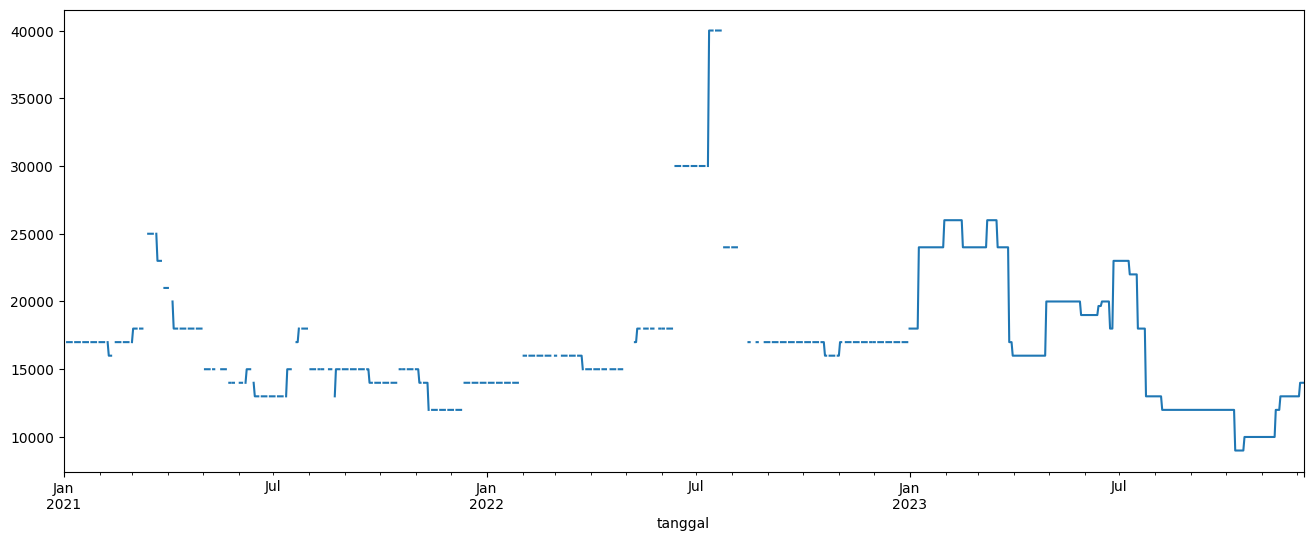

In [43]:
# # plot data mentah
data_merge['harga'].plot(figsize=(16,6))

In [44]:

# Mengisi nilai yang kosong dengan nilai moving average
data_merge['harga'].fillna(data_merge['harga']
                   .rolling(30,center=True,min_periods=1)
                   .median(), inplace=True)
data_merge.loc[data_merge.harga == 0, 'harga'] = data_merge['harga'].rolling(
    30,
    center=True,
    min_periods=1).median()
data_merge.dropna(inplace=True)
data_merge.sample(10)

,tanggal,harga
tanggal,,
2023-01-05,2023-01-05,18000.0
2022-10-09,2022-10-09,17000.0
2023-05-31,2023-05-31,19000.0
2021-02-24,2021-02-24,17000.0
2023-02-12,2023-02-12,26000.0
2021-02-21,2021-02-21,17000.0
2021-12-23,2021-12-23,14000.0
2022-05-28,2022-05-28,18000.0
2022-02-06,2022-02-06,16000.0


In [45]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071 entries, 2021-01-01 to 2023-12-07
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  1071 non-null   datetime64[ns]
 1   harga    1071 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.4 KB


In [46]:

# pilih range tanggal
data_akhir = data_merge.loc[(data_merge['tanggal'] 
             >= start_date) 
             & (data_merge['tanggal'] <= end_date)]

data_akhir = data_akhir[['harga']]
data_akhir.shape

(1071, 1)

In [47]:

# export csv data hasil preprocessing 
data_akhir.to_csv(f"../data/timeseries-{pick_harga}-wonosobo.csv")

<Axes: xlabel='tanggal'>

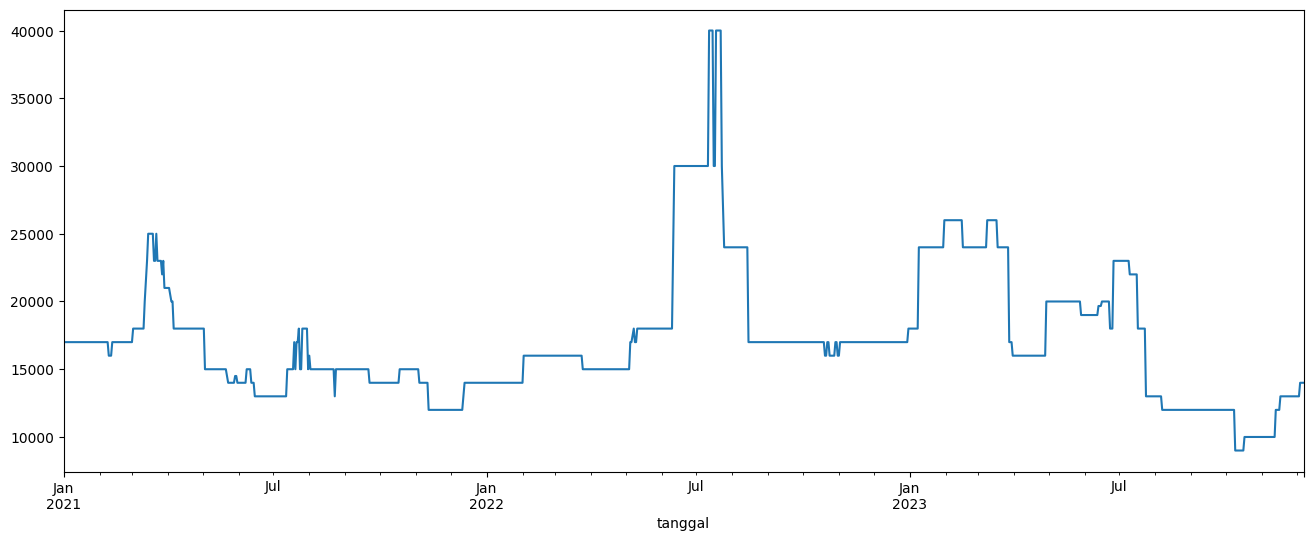

In [48]:

# plot data hasil preprocessing
data_akhir['harga'].plot(figsize=(16,6))
